In [29]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [30]:
# Cargar datos
path_datos = os.path.join('..','..','Datos','Limpios')
df2 = pd.read_csv(os.path.join(path_datos,'datos2_limpios.csv'), index_col=0)

df2_limpio = df2.drop(['Porcentaje Ahorro (%)', 'Ahorro Actual (€)', 'Gasto Mensual (€)',
                        'Vida Esperada (años)', 'Edad de Jubilación'], axis=1)

In [31]:
# Definir variables de entrada y salida
X = df2_limpio.drop(columns=['Años Hasta Jubilación'])
y = df2_limpio['Años Hasta Jubilación']


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Modelos a probar
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'LightGBM': LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'Lasso': Lasso(alpha=0.1),
    'Ridge': Ridge(alpha=1.0),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'Red Neuronal': MLPRegressor(hidden_layer_sizes=(100,50), activation='relu', solver='adam', max_iter=500)}

In [34]:
# Evaluación de los modelos
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Cálculo de métricas
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    
    print(f'----- {name} -----')
    print(f'MAE Entrenamiento: {mae_train:.2f}, MAE Prueba: {mae_test:.2f}')
    print(f'RMSE Entrenamiento: {rmse_train:.2f}, RMSE Prueba: {rmse_test:.2f}')
    print(f'R² Entrenamiento: {r2_train:.2f}, R² Prueba: {r2_test:.2f}')
    print('-' * 30)


----- Random Forest -----
MAE Entrenamiento: 1.12, MAE Prueba: 1.48
RMSE Entrenamiento: 1.35, RMSE Prueba: 1.79
R² Entrenamiento: 0.99, R² Prueba: 0.98
------------------------------
----- Gradient Boosting -----
MAE Entrenamiento: 1.39, MAE Prueba: 1.41
RMSE Entrenamiento: 1.66, RMSE Prueba: 1.69
R² Entrenamiento: 0.98, R² Prueba: 0.98
------------------------------
----- XGBoost -----
MAE Entrenamiento: 1.23, MAE Prueba: 1.45
RMSE Entrenamiento: 1.48, RMSE Prueba: 1.75
R² Entrenamiento: 0.99, R² Prueba: 0.98
------------------------------
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0,000118 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 300
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 2
[LightGBM] [Info] Start training from score 22,275000
----- LightGBM -----
MAE Entrenam

In [35]:
# Validación cruzada
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print(f'R² promedio en validación cruzada para {name}: {np.mean(scores):.2f}')

R² promedio en validación cruzada para Random Forest: 0.98
R² promedio en validación cruzada para Gradient Boosting: 0.98
R² promedio en validación cruzada para XGBoost: 0.98
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0,000091 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 300
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 2
[LightGBM] [Info] Start training from score 22,167500
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0,000098 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 300
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 2
[LightGBM] [Info] Start training from s

In [36]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [120 ,150,180 ],
    'max_depth': [2,4,7],
    'min_samples_split': [7, 10,15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

rf = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

best_model

GradientBoostingRegressor(learning_rate=0.05, max_depth=2, min_samples_split=10,
                          n_estimators=180, random_state=42)

In [37]:
# Modelos a probar
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10,min_samples_split=10, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=120, min_samples_split=10, max_depth=2 , learning_rate=0.05, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'LightGBM': LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'Lasso': Lasso(alpha=0.1),
    'Ridge': Ridge(alpha=1.0),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'Red Neuronal': MLPRegressor(hidden_layer_sizes=(100,50), activation='relu', solver='adam', max_iter=500)}

In [39]:
# Evaluación de los modelos
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Cálculo de métricas
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    
    print(f'----- {name} -----')
    print(f'MAE Entrenamiento: {mae_train:.2f}, MAE Prueba: {mae_test:.2f}')
    print(f'RMSE Entrenamiento: {rmse_train:.2f}, RMSE Prueba: {rmse_test:.2f}')
    print(f'R² Entrenamiento: {r2_train:.2f}, R² Prueba: {r2_test:.2f}')
    print('-' * 30)

----- Random Forest -----
MAE Entrenamiento: 1.20, MAE Prueba: 1.46
RMSE Entrenamiento: 1.44, RMSE Prueba: 1.76
R² Entrenamiento: 0.99, R² Prueba: 0.98
------------------------------
----- Gradient Boosting -----
MAE Entrenamiento: 1.43, MAE Prueba: 1.41
RMSE Entrenamiento: 1.70, RMSE Prueba: 1.69
R² Entrenamiento: 0.98, R² Prueba: 0.98
------------------------------
----- XGBoost -----
MAE Entrenamiento: 1.23, MAE Prueba: 1.45
RMSE Entrenamiento: 1.48, RMSE Prueba: 1.75
R² Entrenamiento: 0.99, R² Prueba: 0.98
------------------------------
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0,000090 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 300
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 2
[LightGBM] [Info] Start training from score 22,275000
----- LightGBM -----
MAE Entrenam

In [40]:
# Cargar nuevo dataset
df = pd.read_csv(os.path.join(path_datos, 'datos1_limpios.csv'), index_col=0)

In [41]:
X_2 = df.drop(['ID', 'FECHA NAC', 'SEXO', 'FECHA ENTRADA', 'PARA CONTAR MESES'], axis=1)

In [42]:
X_2.columns = ['Ingreso Anual (€)','Edad']
X_2 = X_2[['Edad','Ingreso Anual (€)']] 
X_2

,Edad,Ingreso Anual (€)
0,51,15319.07
1,30,19168.80
2,52,18719.86
3,50,12942.60
4,49,20158.08
...,...,...
95,50,25222.69
96,34,18759.95
97,26,22175.25
98,36,25972.71


In [43]:
model_rf = models['Random Forest']

In [44]:
y_pred = model_rf.predict(X_test)
y_pred


array([35.49670209,  3.12435627, 21.4061822 , 32.78651003, 43.60691024,
       19.77363989, 14.92645212, 32.34034301, 33.25840597, 14.60465218,
       32.75769764, 39.43843428,  4.293932  , 16.45419036, 29.33638454,
       38.15573834, 13.23810893, 17.7958538 , 39.53967301, 38.99918555,
       43.13028264, 39.53967301, 13.55573671,  4.86648249, 27.0224097 ,
        7.00213893, 10.74959669, 33.71976907, 26.1431854 , 26.29168655,
       18.23106973, 40.30735775, 33.57230937, 26.55852882, 27.46870471,
       34.01726938, 12.37276799, 40.29402442, 24.55655237,  7.94080035,
       25.94128775, 11.52742507,  4.95018324, 23.94814167, 27.14296285,
        8.17150673, 20.42512057, 28.79717462, 22.61835394,  6.46106045,
       17.38514497,  1.50508234, 32.22731456, 12.80553942,  7.5308933 ,
       43.05504183, 17.38178224,  3.6335444 ,  6.89271037, 35.89198571,
        3.13811928, 26.17963765, 23.76299836, 34.01726938, 24.55655237,
       40.6146452 , 28.74969139,  0.54058167, 27.2142872 , 12.31

In [45]:
y_test.shape

(1000,)

In [46]:
y_pred.shape

(1000,)

In [47]:
y_test = pd.DataFrame(y_test)
y_test['PRED'] = y_pred
y_test['Error'] = y_test['Años Hasta Jubilación']-y_test['PRED']
y_test


,Años Hasta Jubilación,PRED,Error
1501,36,35.496702,0.503298
2586,1,3.124356,-2.124356
2653,20,21.406182,-1.406182
1055,32,32.786510,-0.786510
705,46,43.606910,2.393090
...,...,...,...
4711,18,18.911659,-0.911659
2313,30,29.445743,0.554257
3214,3,3.378362,-0.378362
2732,16,18.143908,-2.143908


In [48]:
predicciones = model_rf.predict(X_2)
predicciones

array([13.98262001, 34.4483956 , 11.53055267, 14.17479553, 15.48819722,
       25.67418915, 32.97294853, 16.57208206, 10.27555356, 20.70366511,
       39.49169753, 10.21859306, 21.7463586 , 19.00956188, 22.24319767,
       26.80642023, 31.49206201, 39.63968069, 36.38587557, 28.46068875,
       21.19619153, 14.85128464, 18.29395875, 29.88346234, 15.61678798,
       37.06218053, 28.79717462, 17.17586968, 29.77998895, 32.34034301,
       16.31289854, 34.76166547, 22.61835394, 36.7967329 , 26.62204636,
       29.68013587, 24.37139798, 37.74428142, 28.18422076, 28.47366018,
       34.12057247, 27.39953012, 32.34034301, 27.33028918, 23.00018243,
       19.39076646, 11.99451131, 10.63156999, 34.39730358, 35.9830417 ,
       34.50472559, 29.4457431 , 31.03023204, 30.61250875, 37.67005605,
       36.24023334, 18.20505922, 37.94599049, 27.4449583 , 14.55996624,
       14.45108669, 19.40701626, 38.3924153 , 37.37507263, 24.45949825,
       29.96149091, 14.688262  , 38.94179845, 37.43058761,  9.24

In [49]:
df['AÑOS HASTA JUBILACION'] = predicciones
df['EDAD DE JUBILACION'] = df['EDAD'] + df['AÑOS HASTA JUBILACION']

df.head()

,ID,FECHA NAC,SEXO,NOMINA BRUTA 01/01/2025,FECHA ENTRADA,PARA CONTAR MESES,EDAD,AÑOS HASTA JUBILACION,EDAD DE JUBILACION
0,1,1974-03-22,H,15319.07,2002-05-01,2002-05-01,51,13.982620,64.982620
1,2,1995-06-21,M,19168.80,2018-04-13,2018-05-01,30,34.448396,64.448396
2,3,1973-06-07,H,18719.86,2002-04-01,2002-04-01,52,11.530553,63.530553
3,4,1975-07-03,M,12942.60,2002-04-01,2002-04-01,50,14.174796,64.174796
4,5,1976-07-19,M,20158.08,2003-04-01,2003-04-01,49,15.488197,64.488197


<Axes: >

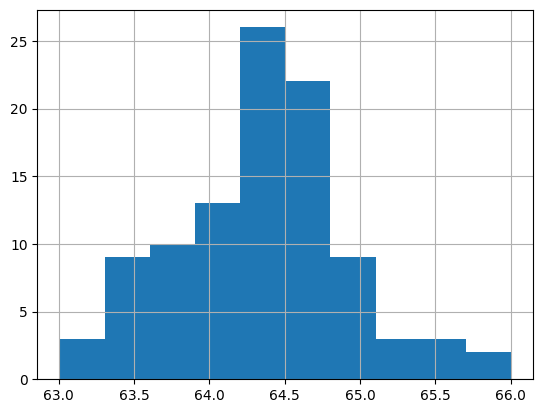

In [50]:
df['EDAD DE JUBILACION'].hist()

<Axes: >

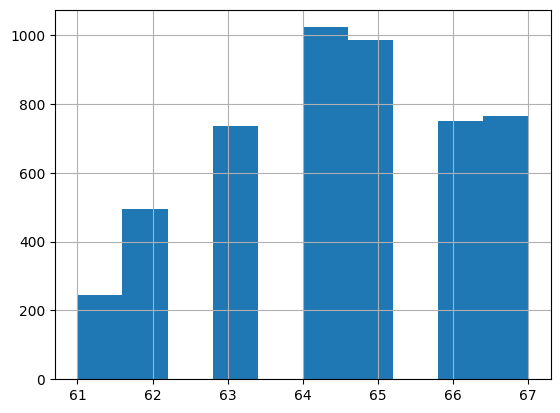

In [51]:
df2['Edad de Jubilación'].hist()

In [56]:
import pickle

In [57]:
with open('modelo_def.pkl', 'wb') as handle:
    pickle.dump(model_rf, handle)

In [52]:
model_rf = models['Gradient Boosting']

In [53]:
predicciones = model_rf.predict(X_2)
predicciones

array([13.90339689, 34.33949452, 12.41293293, 14.49934643, 15.69224246,
       25.43607123, 32.66838809, 17.54780258, 10.2609285 , 21.55824765,
       39.29741884, 10.2609285 , 21.55824765, 19.51337192, 21.55824765,
       26.47066189, 31.58215707, 39.29741884, 36.29994466, 28.54733149,
       21.55824765, 15.69224246, 19.51337192, 30.1216298 , 15.69224246,
       36.29994466, 28.54733149, 17.54780258, 30.1216298 , 32.66838809,
       17.54780258, 34.33949452, 22.67015261, 35.68353025, 26.47066189,
       29.31156298, 24.32447385, 38.35511357, 28.54733149, 28.54733149,
       34.33949452, 27.44217852, 32.66838809, 27.44217852, 21.55824765,
       20.64094634, 12.41293293, 10.2609285 , 33.32772506, 36.29994466,
       34.33949452, 30.1216298 , 31.58215707, 30.1216298 , 37.46718741,
       36.29994466, 18.73398128, 37.46718741, 26.47066189, 14.49934643,
       13.90339689, 19.51337192, 39.29741884, 38.35511357, 24.32447385,
       30.1216298 , 14.49934643, 38.35511357, 38.35511357,  8.24

In [54]:
df['AÑOS HASTA JUBILACION'] = predicciones
df['EDAD DE JUBILACION'] = df['EDAD'] + df['AÑOS HASTA JUBILACION']

df.head()

,ID,FECHA NAC,SEXO,NOMINA BRUTA 01/01/2025,FECHA ENTRADA,PARA CONTAR MESES,EDAD,AÑOS HASTA JUBILACION,EDAD DE JUBILACION
0,1,1974-03-22,H,15319.07,2002-05-01,2002-05-01,51,13.903397,64.903397
1,2,1995-06-21,M,19168.80,2018-04-13,2018-05-01,30,34.339495,64.339495
2,3,1973-06-07,H,18719.86,2002-04-01,2002-04-01,52,12.412933,64.412933
3,4,1975-07-03,M,12942.60,2002-04-01,2002-04-01,50,14.499346,64.499346
4,5,1976-07-19,M,20158.08,2003-04-01,2003-04-01,49,15.692242,64.692242


<Axes: >

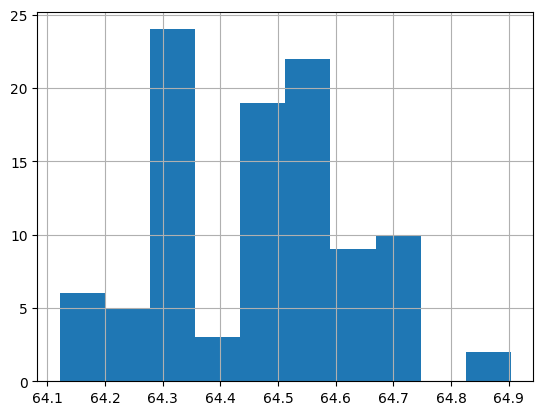

In [55]:
df['EDAD DE JUBILACION'].hist()